# Student grades prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [4]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [5]:
df.isnull().sum().sum()

425

# Clean the data

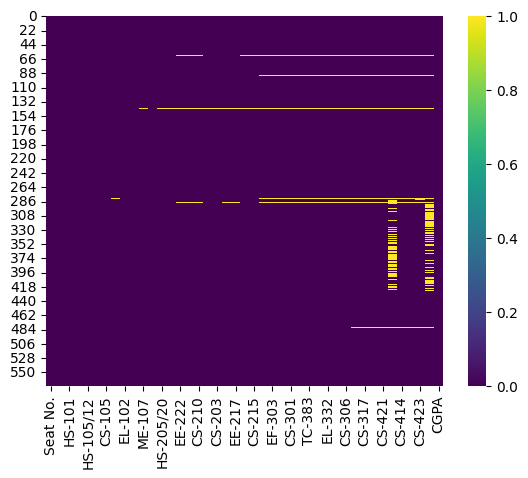

In [6]:
# check if there is any missing value
sns.heatmap(df.isnull(), cmap='viridis')

plt.show()

In [7]:
df.replace(np.nan,0, inplace=True)
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [8]:
input = df.drop(['CS-403','CS-421','CS-406','CS-414','CS-419','CS-412','MT-442','Seat No.','CGPA'],axis=1)
target = df [["CGPA"]]

In [9]:
target.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


In [10]:
pd.unique(df['PH-121'])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [11]:
grades_enc = {'B-':2.7,'A':4,'D':1.0,'A-':3.7,'B+':3.4,'B':3.0,'C+':2.4,'C':2.0,'C-':1.7,'D+':1.4,'WU':0.0,'A+':4,'F':0.0,'W':0,'I':0}

In [12]:
type (input)

pandas.core.frame.DataFrame

In [13]:
for item in input:
    input[item]= input[item].replace(grades_enc)
    
input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CS-423
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7,3.0
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0,2.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0,3.7
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4,3.7


In [14]:
# Concating input and targets for the data insights
df = pd.concat([input, target],axis = 1)

# Discover and Visualize the Data to Gain Insights:

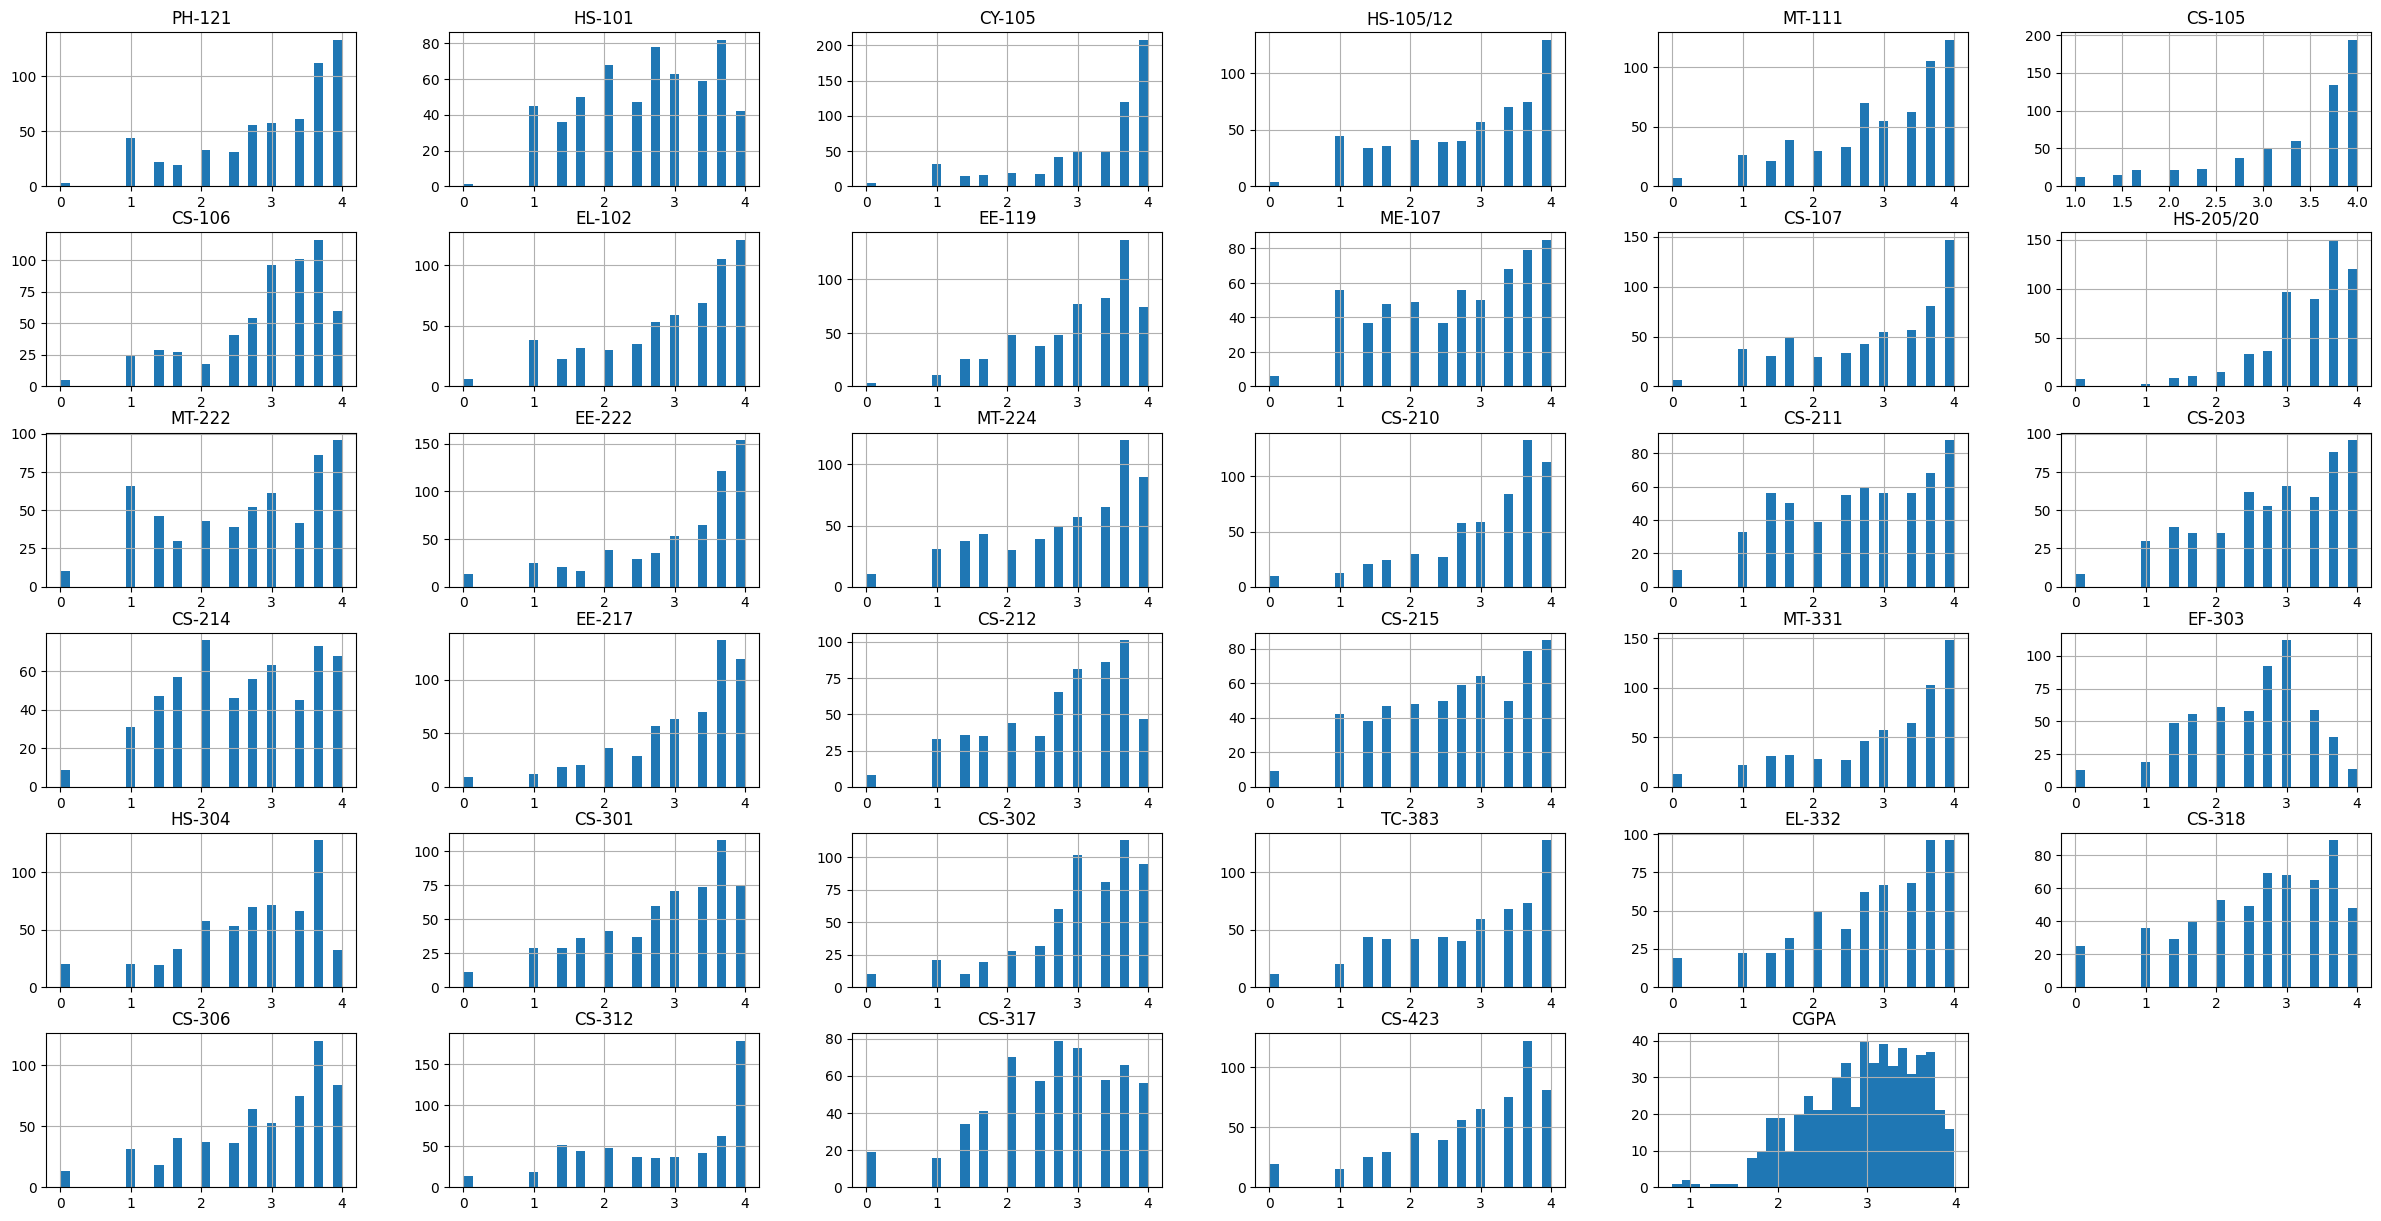

In [15]:
df.hist(bins=30,figsize=(30,15))
plt.show()

# Looking for Correlations

<Axes: >

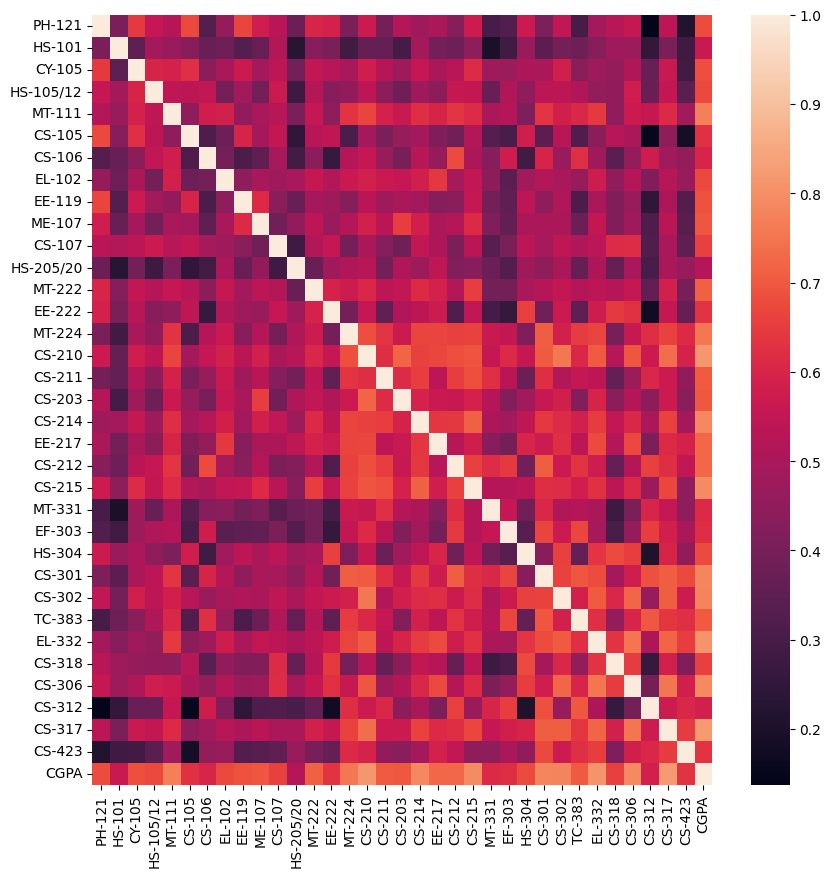

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [17]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CS-423,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.262697,2.878984,2.988091,3.329247,2.961996,2.969877,3.020140,2.698599,...,2.850788,3.050088,2.873730,2.863748,2.628371,2.892119,2.892294,2.651138,2.906305,2.954888
std,0.971594,0.908402,0.932997,1.019208,0.954343,0.799826,0.869226,0.981676,0.839463,1.029323,...,0.970483,0.877124,1.017053,1.009585,1.035205,0.989909,1.095450,0.952455,0.987516,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.700000,2.000000,2.000000,2.000000,2.400000,2.000000,2.000000,2.400000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,3.400000,3.000000,3.000000,2.700000,3.000000,3.000000,2.700000,3.000000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,3.700000,3.700000,3.700000,3.400000,3.700000,4.000000,3.400000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [18]:
# splitting file into different columns based on our model prediction requirement

model1_columns = []
model2_columns = []
model3_columns = []
for item in [input]:
    for i in item:
        if i[3]=='1':
            model1_columns.append(i)
        elif i[3]=='2':
            model2_columns.append(i)
        else:
            model3_columns.append(i)
model2_columns = model1_columns + model2_columns
model3_columns = model2_columns + model3_columns

# Prepare the data for Linear Regression

In [19]:
# input data
labels = df['CGPA'].values
features = df[list(model3_columns)].values

In [20]:
#split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size=0.30)

In [21]:
# built a model
from sklearn import linear_model
lr_3 = linear_model.LinearRegression()
lr_3.fit(X_train,y_train)

LinearRegression()

In [22]:
# Predict
# Predict for training set
y_train_predict = lr_3.predict(X_train)

# Predict for testing set
y_test_predict = lr_3.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# model evaluation for training set
mse_train =mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train,y_train_predict)
print("The model Performance for training set")
print('RMSE is{}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))


# model evaluation for testing set
mse_test =mean_squared_error(y_test, y_test_predict)
mae_test = mean_absolute_error(y_test,y_test_predict)
print("The model Performance for training set")
print('RMSE is{}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))


test_score = lr_3.score(X_test,y_test)
print("The Score Of model for testing set")
print("Test Score {}".format(test_score.round(2)))

The model Performance for training set
RMSE is0.1434800874935748
MAE is 0.08739420175918987
The model Performance for training set
RMSE is0.12759122986505134
MAE is 0.09044423326104734
The Score Of model for testing set
Test Score 0.96


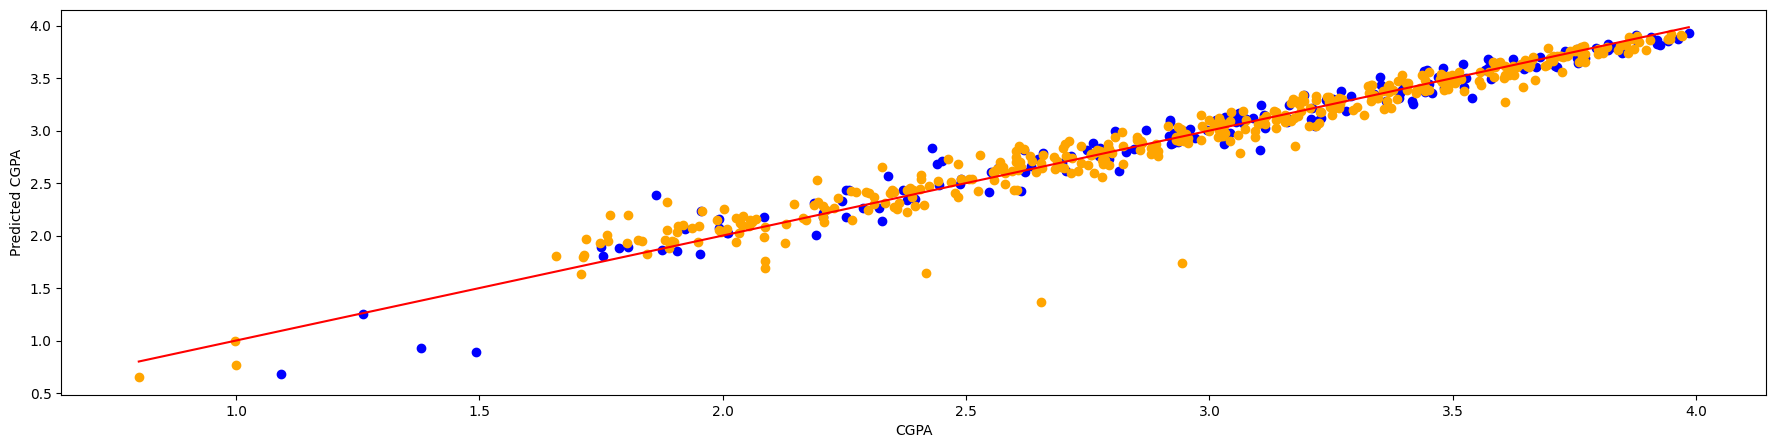

In [24]:
plt.figure(figsize=(22,5))
plt.scatter(y_test,y_test_predict, color = "blue")
plt.scatter(y_train,y_train_predict, color = "Orange")
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df["CGPA"].max()], color ='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Prepare The Data for Random Forest

In [25]:
# input Data
labels = df['CGPA'].values
features = df[list(model3_columns)].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf_3 = RandomForestRegressor(n_estimators =20, random_state=0)
rf_3.fit(X_train,y_train)
y_pred = rf_3.predict(X_test)

In [29]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("The Score of Model of testing set", rf_3.score(X_test,y_test))
      

Mean Absolute Error: 0.09533347826086963
Mean Squared Error: 0.015914152847826102
Root Mean Squared Error: 0.12615130933853244
The Score of Model of testing set 0.9542393240562277


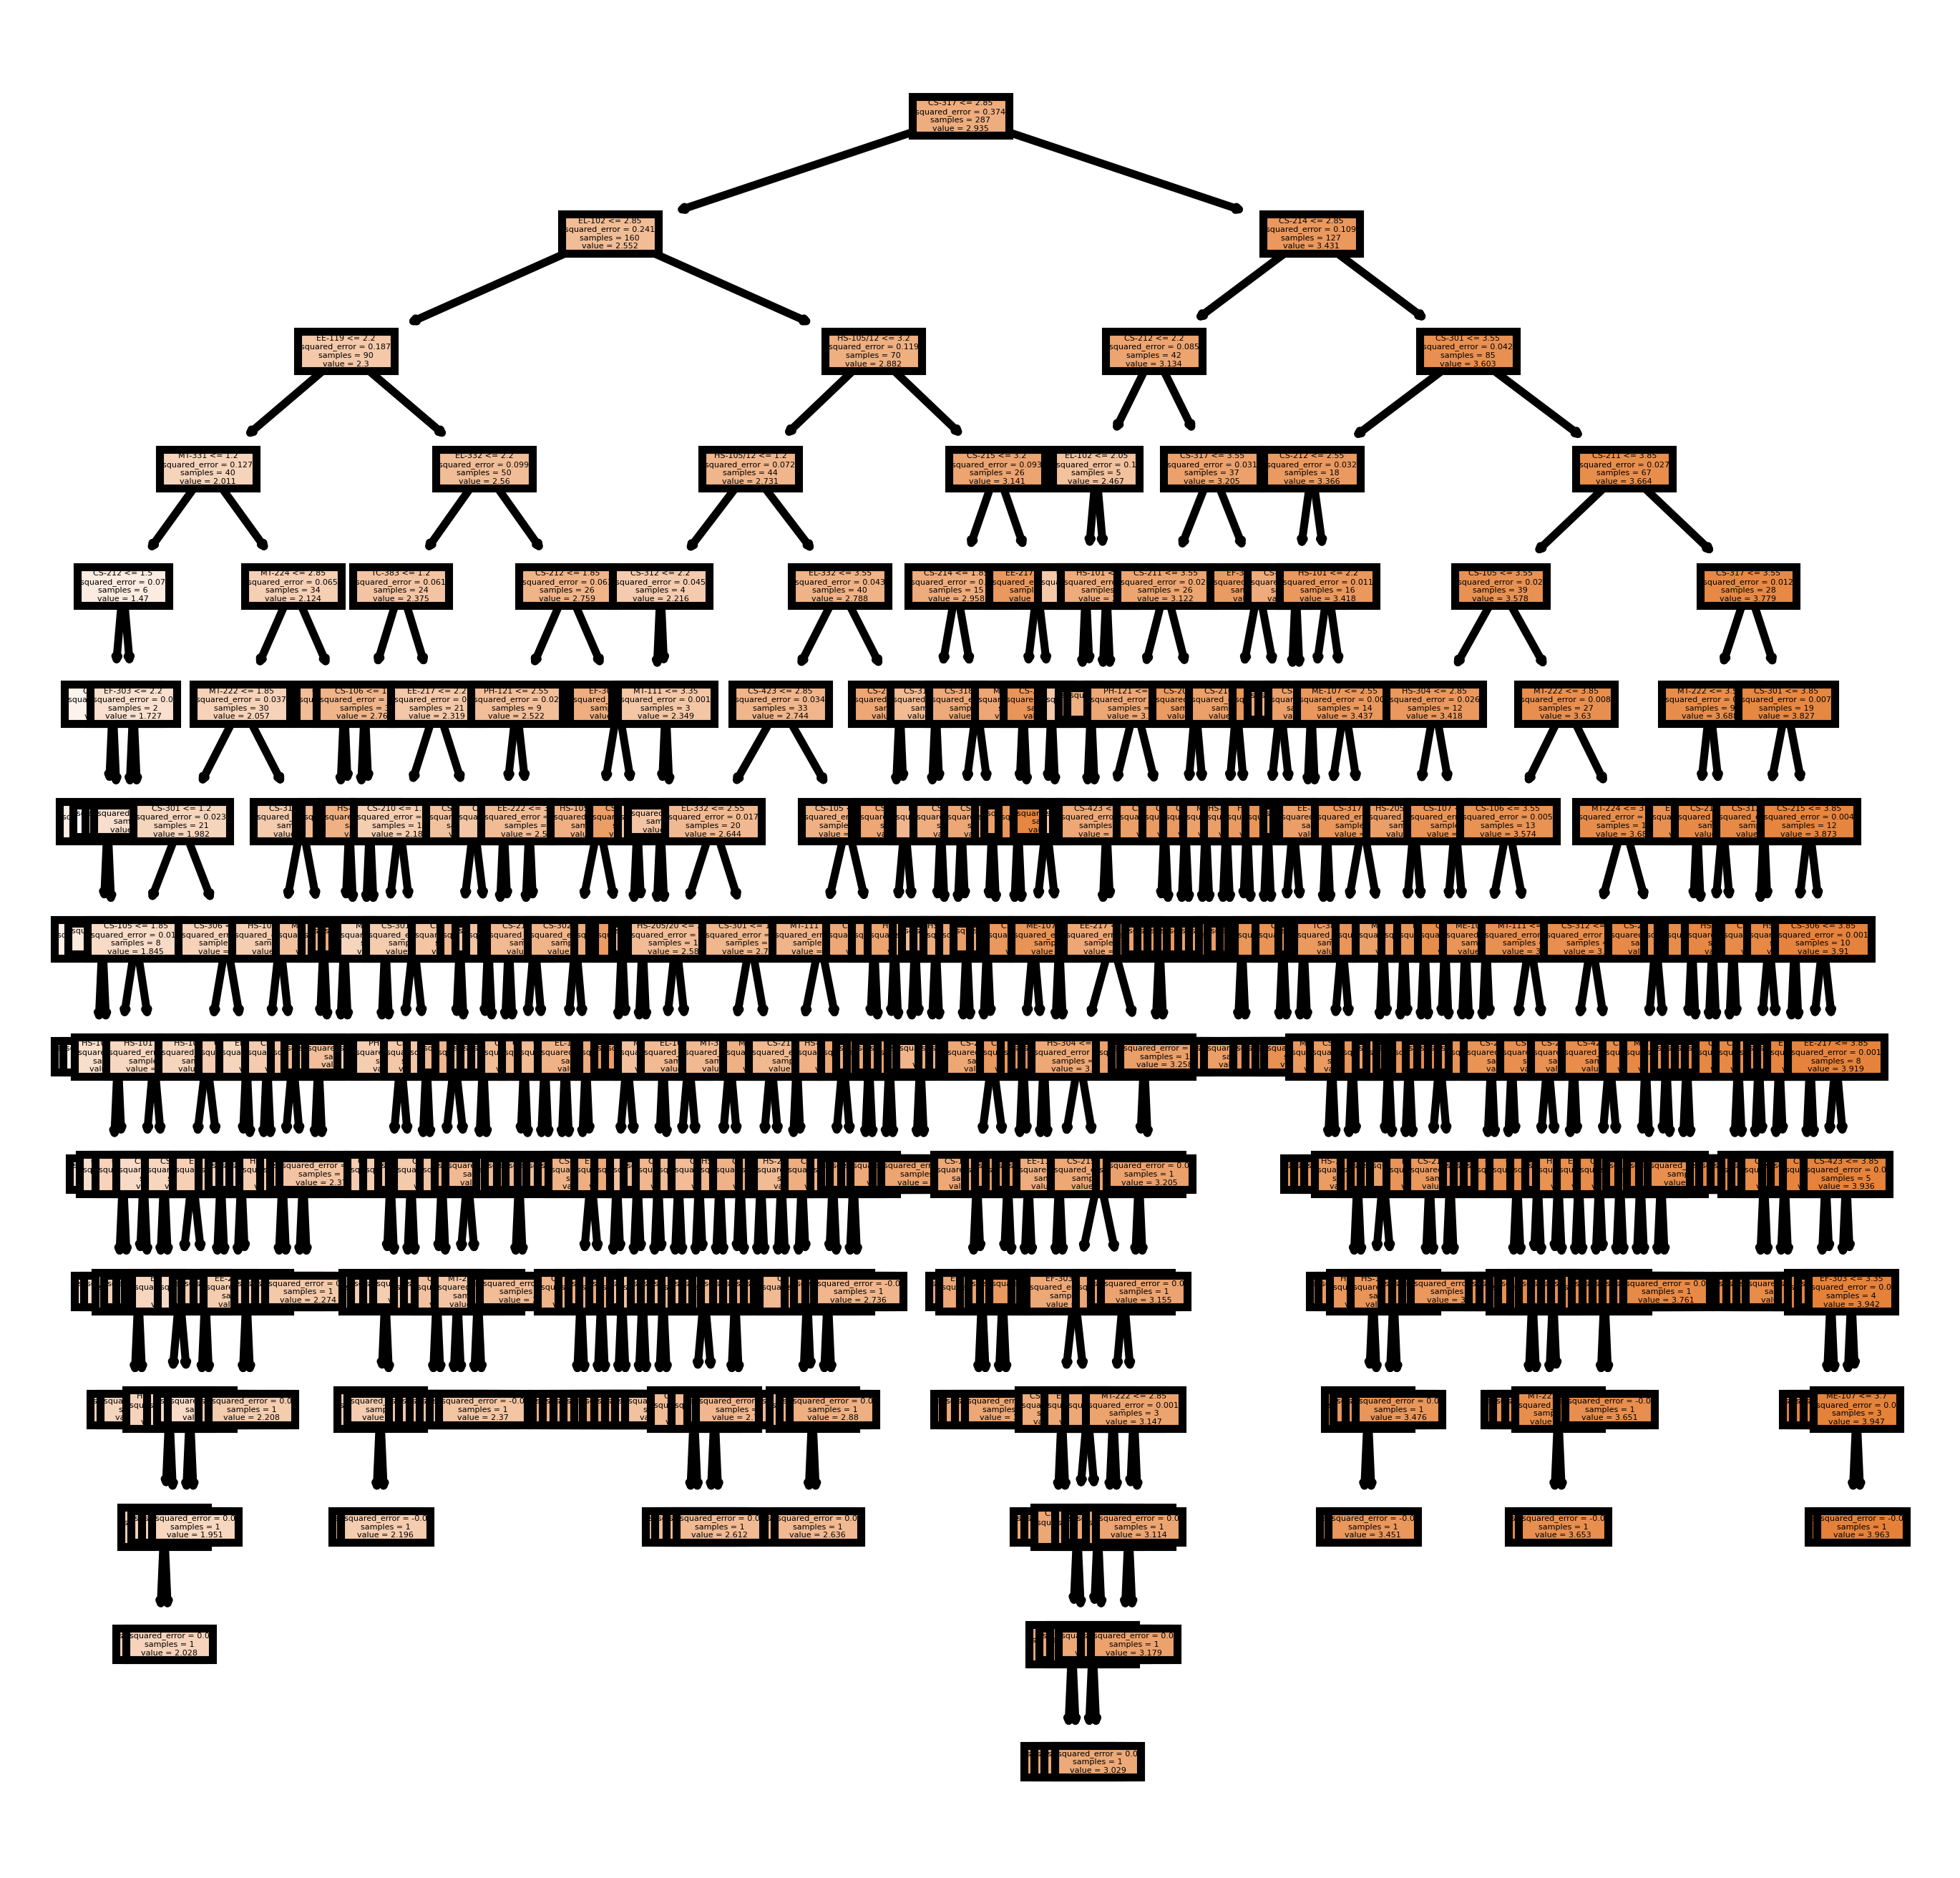

In [30]:
from sklearn import tree
fn=model3_columns
cn="CGPA"
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=800)
tree.plot_tree(rf_3.estimators_[0],
              feature_names = fn,
              class_names=cn,
              filled = True);
fig.savefig('rf_model3_individualtree.png')

In [31]:
del input

In [32]:
print("------------------------Hello From CGPA Predictor-----------------------")

model_1=[]
input_lr=[]
name = input ("What is your name? ")
model= int(input ("From which model would you like to predict your GPA ?"))
if model ==1:
    for val in model3_columns:
        string = "Enter your" + val + "GPA:"
        GPA = input(string)
        if GPA in grades_enc.keys():
            model_1.append(grades_enc[GPA])
        else:
            model_1.append(0)
    input_lr.append(model_1)
    print(f"{name}, your prediction CGPA according to Linear Regression Algorithm is:{lr_3.predict(input_lr)}")
    print(f"{name}, your prediction CGPA according to Random Forest Algorithm is:{rf_3.predict(input_lr)}")
else:
    print("Kindly enter valid value")
print("Have a NICE DAY !!")

------------------------Hello From CGPA Predictor-----------------------
What is your name? Harsh
From which model would you like to predict your GPA ?1
Enter yourPH-121GPA:A
Enter yourHS-101GPA:A
Enter yourCY-105GPA:A
Enter yourHS-105/12GPA:A
Enter yourMT-111GPA:A
Enter yourCS-105GPA:B
Enter yourCS-106GPA:C
Enter yourEL-102GPA:D
Enter yourEE-119GPA:F
Enter yourME-107GPA:A
Enter yourCS-107GPA:B-
Enter yourHS-205/20GPA:B
Enter yourMT-222GPA:C
Enter yourEE-222GPA:B
Enter yourMT-224GPA:A
Enter yourCS-210GPA:A
Enter yourCS-211GPA:A
Enter yourCS-203GPA:A
Enter yourCS-214GPA:B
Enter yourEE-217GPA:B
Enter yourCS-212GPA:C
Enter yourCS-215GPA:B
Enter yourMT-331GPA:C
Enter yourEF-303GPA:B
Enter yourHS-304GPA:
Enter yourCS-301GPA:D
Enter yourCS-302GPA:V
Enter yourTC-383GPA:A
Enter yourEL-332GPA:B
Enter yourCS-318GPA:A
Enter yourCS-306GPA:A
Enter yourCS-312GPA:A
Enter yourCS-317GPA:A
Enter yourCS-423GPA:A
Harsh, your prediction CGPA according to Linear Regression Algorithm is:[2.93799782]
Harsh, y